# Combining and analyzing Halifax NHS and Census profiles from 2006-2016

This notebook analyzes data collected from the 2006-2016 National Household Survey profiles by census tract number.

In [29]:
import pandas as pd
import numpy as np
import geopandas as gpd
import pathlib
import matplotlib.pyplot as plt
import descartes
from shapely import wkt
import contextily as ctx
import operator
import mapclassify
import matplotlib.colors as cl

##Read Canadian census tract shapefile data
- Read data obtained from the [Statistics Canada 2016 Boundary files](https://www12.statcan.gc.ca/census-recensement/2011/geo/bound-limit/bound-limit-2016-eng.cfm).
- Reduce dataset to selected tract ID (TID)s for the Halifax area, along with their geometry data.
- Read filtered data obtained from the 2006-2016 NHS profiles and combine it with the Halifax geometry data.

In [2]:
tracts = gpd.read_file('lct_000a16a_e.shp')
tracts = tracts.to_crs(epsg=3857)
tracts.head()

,CTUID,CTNAME,PRUID,PRNAME,CMAUID,CMAPUID,CMANAME,CMATYPE,geometry
0,0010002.00,0002.00,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,001,10001,St. John's,B,"POLYGON ((-5868818.937 6032568.660, -5868626.4..."
1,5370001.09,0001.09,35,Ontario,537,35537,Hamilton,B,"POLYGON ((-8889513.236 5340616.750, -8889520.1..."
2,5370120.02,0120.02,35,Ontario,537,35537,Hamilton,B,"POLYGON ((-8899505.233 5337760.930, -8899589.5..."
3,0010006.00,0006.00,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,001,10001,St. John's,B,"POLYGON ((-5867749.009 6034404.476, -5867795.0..."
4,0010007.00,0007.00,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,001,10001,St. John's,B,"POLYGON ((-5866656.511 6035785.686, -5866595.6..."


In [3]:
data2006 = pd.read_csv('2006-census-data.csv')
data2011 = pd.read_csv('2011-census-data.csv')
data2016 = pd.read_csv('2016-census-data.csv')
data2006['geometry'] = None
data2011['geometry'] = None
data2016['geometry'] = None
data2006.head()

,tid,population,white,indigenous,black,asian,minority,adult,income,home,rent,education,p_white,p_indig,p_black,p_asian,p_mnrty,p_poc,p_educ,geometry
0,2050001.00,3650,3215,55,330,20,30,1915,19592,148100,475,260,0.880822,0.015068,0.090411,0.005479,0.008219,0.119178,0.071233,None
1,2050002.00,5200,4635,120,245,145,55,2805,24012,226552,534,835,0.891346,0.023077,0.047115,0.027885,0.010577,0.108654,0.160577,None
2,2050003.00,2700,2240,10,90,290,70,1740,26366,479064,907,990,0.829630,0.003704,0.033333,0.107407,0.025926,0.170370,0.366667,None
3,2050004.01,3205,2650,40,70,340,105,2425,17524,235254,780,1170,0.826833,0.012480,0.021841,0.106084,0.032761,0.173167,0.365055,None
4,2050004.02,4175,3415,50,115,510,85,2885,14430,378830,761,1295,0.817964,0.011976,0.027545,0.122156,0.020359,0.182036,0.310180,None


In [ ]:
for index, row in tracts.iterrows():
  t = float(row.CTUID)
  for j in range(len(data2006)):
    if t == float(data2006['tid'][j]):
      data2006['geometry'][j] = row.geometry
      data2011['geometry'][j] = row.geometry
      data2016['geometry'][j] = row.geometry

In [5]:
halifax2006 = gpd.GeoDataFrame(data2006, geometry='geometry')
halifax2011 = gpd.GeoDataFrame(data2011, geometry='geometry')
halifax2016 = gpd.GeoDataFrame(data2016, geometry='geometry')
halifax2016.head()

,tid,population,white,indigenous,black,asian,minority,adult,income,home,rent,education,p_white,p_indig,p_black,p_asian,p_mnrty,p_poc,p_educ,geometry
0,2050001.00,3820,3085,185,365,140,45,3060,30071,241737,647,425,0.807592,0.048429,0.095550,0.036649,0.011780,0.192408,0.111257,"POLYGON ((-7081505.483 5559791.027, -7081480.6..."
1,2050002.00,6045,5180,240,280,280,65,5055,31630,332449,701,1045,0.856907,0.039702,0.046319,0.046319,0.010753,0.143093,0.172870,"POLYGON ((-7080065.205 5563897.150, -7080020.1..."
2,2050003.00,2650,1930,25,55,590,50,2355,37808,885647,1197,995,0.728302,0.009434,0.020755,0.222642,0.018868,0.271698,0.375472,"POLYGON ((-7075139.274 5560833.900, -7075774.0..."
3,2050004.01,3515,2420,65,145,775,110,3355,24192,438599,1002,1170,0.688478,0.018492,0.041252,0.220484,0.031294,0.311522,0.332859,"POLYGON ((-7076788.719 5564428.644, -7076922.8..."
4,2050004.02,4645,3125,100,175,895,350,4420,20133,504598,1025,1580,0.672766,0.021529,0.037675,0.192680,0.075350,0.327234,0.340151,"POLYGON ((-7076903.990 5564534.164, -7076922.8..."


## Prepare graphs

In [58]:
colours = ['#f4fbfc','#ddf3f5', '#9edfe5', '#70c2df', '#77ade6', '#7e84f3', '#7354f4', '#6146d9', '#3f2da5']
cmap1 = cl.ListedColormap(colours[0:9])
cmap2 = cl.ListedColormap(colours[0:7])
cmap3 = cl.ListedColormap(colours[0:6])
cmap4 = cl.ListedColormap(colours[0:5])

Text(0.5, 1.0, '2016')

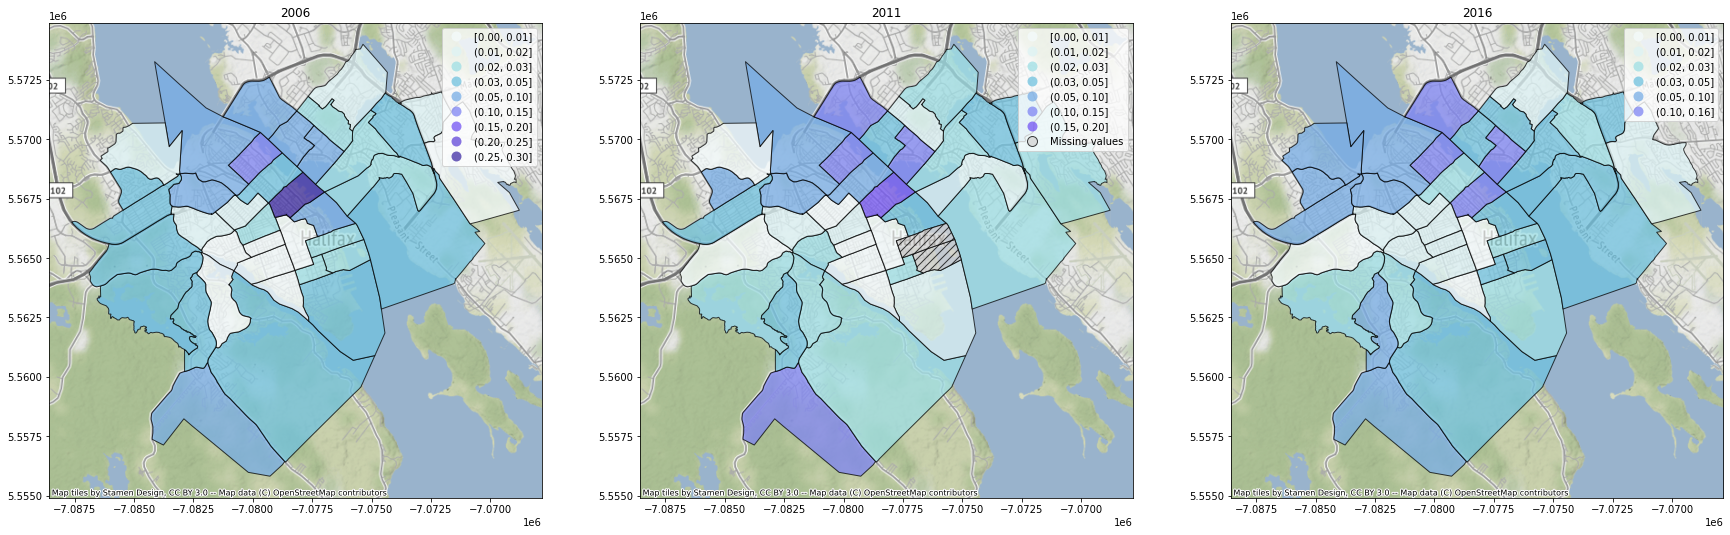

In [52]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_figheight(15)
fig.set_figwidth(30)
halifax2006.plot(     column='p_black',
                      ax=ax1,
                      scheme='User_Defined',
                      classification_kwds=dict(bins=[0.01,0.02,0.03,0.05,0.1,0.15,0.2,0.25,0.3]),
                      alpha=0.75, 
                      edgecolor='k', 
                      legend=True,
                      cmap=cmap1)
ctx.add_basemap(ax1, zoom=12)
ax1.set_title("2006")
halifax2011.plot(     column='p_black',
                      ax=ax2, 
                      scheme='User_Defined',
                      classification_kwds=dict(bins=[0.01,0.02,0.03,0.05,0.1,0.15,0.2]),
                      alpha=0.75, 
                      edgecolor='k', 
                      legend=True,
                      missing_kwds={ "color": "lightgrey", "hatch": "///", "label": "Missing values", },
                      cmap=cmap2)
ctx.add_basemap(ax2, zoom=12)
ax2.set_title("2011")
halifax2016.plot(     column='p_black',
                      ax=ax3, 
                      scheme='User_Defined',
                      classification_kwds=dict(bins=[0.01,0.02,0.03,0.05,0.1,0.16]),
                      alpha=0.75, 
                      edgecolor='k', 
                      legend=True,
                      cmap=cmap3)
ctx.add_basemap(ax3, zoom=12)
ax3.set_title("2016")

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_figheight(15)
fig.set_figwidth(30)
halifax2006.plot(     column='p_indig',
                      ax=ax1,
                      scheme='User_Defined',
                      classification_kwds=dict(bins=[0.01,0.02,0.03,0.05]),
                      alpha=0.75, 
                      edgecolor='k', 
                      legend=True,
                      cmap=cmap4)
ctx.add_basemap(ax1, zoom=12)
ax1.set_title("2006")
halifax2011.plot(     column='p_indig',
                      ax=ax2, 
                      scheme='User_Defined',
                      classification_kwds=dict(bins=[0.01,0.02,0.03,0.05,0.10]),
                      alpha=0.75, 
                      edgecolor='k', 
                      legend=True,
                      missing_kwds={ "color": "lightgrey", "hatch": "///", "label": "Missing values", },
                      cmap=cmap3)
ctx.add_basemap(ax2, zoom=12)
ax2.set_title("2011")
halifax2016.plot(     column='p_indig',
                      ax=ax3, 
                      scheme='User_Defined',
                      classification_kwds=dict(bins=[0.01,0.02,0.03,0.05,0.10]),
                      alpha=0.75, 
                      edgecolor='k', 
                      legend=True,
                      cmap=cmap3)
ctx.add_basemap(ax3, zoom=12)
ax3.set_title("2016")

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_figheight(15)
fig.set_figwidth(30)
halifax2006.plot(     column='p_asian',
                      ax=ax1,
                      scheme='quantiles',
                      classification_kwds=dict(bins=[0.01,0.02,0.05,0.10,0.15,0.20,0.25]),
                      alpha=0.75, 
                      edgecolor='k', 
                      legend=True,
                      cmap=cmap3)
ctx.add_basemap(ax1, zoom=12)
ax1.set_title("2006")
halifax2011.plot(     column='p_asian',
                      ax=ax2,
                      scheme='quantiles',
                      #classification_kwds=dict(bins=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40]),
                      k=7,
                      alpha=0.75, 
                      edgecolor='k', 
                      legend=True,
                      missing_kwds={ "color": "lightgrey", "hatch": "///", "label": "Missing values", },
                      cmap=cmap2)
ctx.add_basemap(ax2, zoom=12)
ax2.set_title("2011")
halifax2016.plot(     column='p_asian',
                      ax=ax3,
                      scheme='quantiles',
                      #classification_kwds=dict(bins=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40]),
                      k=7,
                      alpha=0.75, 
                      edgecolor='k', 
                      legend=True,
                      cmap=cmap2)
ctx.add_basemap(ax3, zoom=12)
ax3.set_title("2016")

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_figheight(15)
fig.set_figwidth(30)
halifax2006.plot(     column='p_poc',
                      ax=ax1,
                      scheme='User_Defined',
                      classification_kwds=dict(bins=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40]),
                      alpha=0.75, 
                      edgecolor='k', 
                      legend=True,
                      cmap=cmap1)
ctx.add_basemap(ax1, zoom=12)
ax1.set_title("2006")
halifax2011.plot(     column='p_poc',
                      ax=ax2,
                      scheme='User_Defined',
                      classification_kwds=dict(bins=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40]),
                      alpha=0.75, 
                      edgecolor='k', 
                      legend=True,
                      missing_kwds={ "color": "lightgrey", "hatch": "///", "label": "Missing values", },
                      cmap=cmap1)
ctx.add_basemap(ax2, zoom=12)
ax2.set_title("2011")
halifax2016.plot(     column='p_poc',
                      ax=ax3,
                      scheme='User_Defined',
                      classification_kwds=dict(bins=[0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40]),
                      alpha=0.75, 
                      edgecolor='k', 
                      legend=True,
                      cmap=cmap1)
ctx.add_basemap(ax3, zoom=12)
ax3.set_title("2016")

## Determine gentrification potential from 2006 tract data
A tract was eligible to gentrify if it met the following criteria:

1. The tract had a population of at least 500 residents at the beginning and end of a decade and was located within a central city. All census tracts meet this condition.
2. The tract’s median household income was in the bottom 40th percentile when compared to all tracts within its metro area at the beginning of the decade.
3. The tract’s median home value was in the bottom 40th percentile when compared to all tracts within its metro area at the beginning of the decade.

In [128]:
census_tracts = pd.DataFrame(columns=['tid','geometry','income_eligible','home_eligible','educ_eligible','home_value_eligible'])
census_tracts['tid'] = halifax2006['tid']
census_tracts['geometry'] = halifax2006['geometry']

,tid,geometry,income_eligible,home_eligible,educ_eligible,home_value_eligible
0,2050001.00,"POLYGON ((-7081505.483 5559791.027, -7081480.6...",NaN,NaN,NaN,NaN
1,2050002.00,"POLYGON ((-7080065.205 5563897.150, -7080020.1...",NaN,NaN,NaN,NaN
2,2050003.00,"POLYGON ((-7075139.274 5560833.900, -7075774.0...",NaN,NaN,NaN,NaN
3,2050004.01,"POLYGON ((-7076788.719 5564428.644, -7076922.8...",NaN,NaN,NaN,NaN
4,2050004.02,"POLYGON ((-7076903.990 5564534.164, -7076922.8...",NaN,NaN,NaN,NaN


In [ ]:
income2006 = np.array(halifax2006['income'])
min_income = income2006.min()
max_income = income2006.max()
percentile50 = np.percentile(income2006, 50)

for i in range(len(census_tracts['tid'])):
  if halifax2006['income'][i] < percentile50:
    census_tracts['income_eligible'][i] = True
  else:
    census_tracts['income_eligible'][i] = False

In [ ]:
home2006 = np.array(halifax2006['home'])
min_home = home2006.min()
max_home = home2006.max()
percentile50 = np.percentile(home2006, 50)

for i in range(len(census_tracts['tid'])):
  if halifax2006['home'][i] < percentile50 and census_tracts['income_eligible'][i] == True:
    census_tracts['home_eligible'][i] = True
  else:
    census_tracts['home_eligible'][i] = False

[  7.06898779  24.84956587  82.07958334  26.82181119  59.36227259
 100.          74.83041455  56.0986168   44.99062832  32.74806617
  30.32525503  42.19634969  67.33103215  64.73506594  35.00973431
   4.44582445  28.51709906  51.63760729  32.90535625  28.3561827
  37.56626468  24.08056697  15.99214003  21.38986408  13.89705432
  14.19486292  31.75106465   0.89795863   7.60477128  24.43594282
  17.28785671  13.37214968  26.97071549  33.91776947  17.54396303
  19.90104777   5.79956167   0.        ]


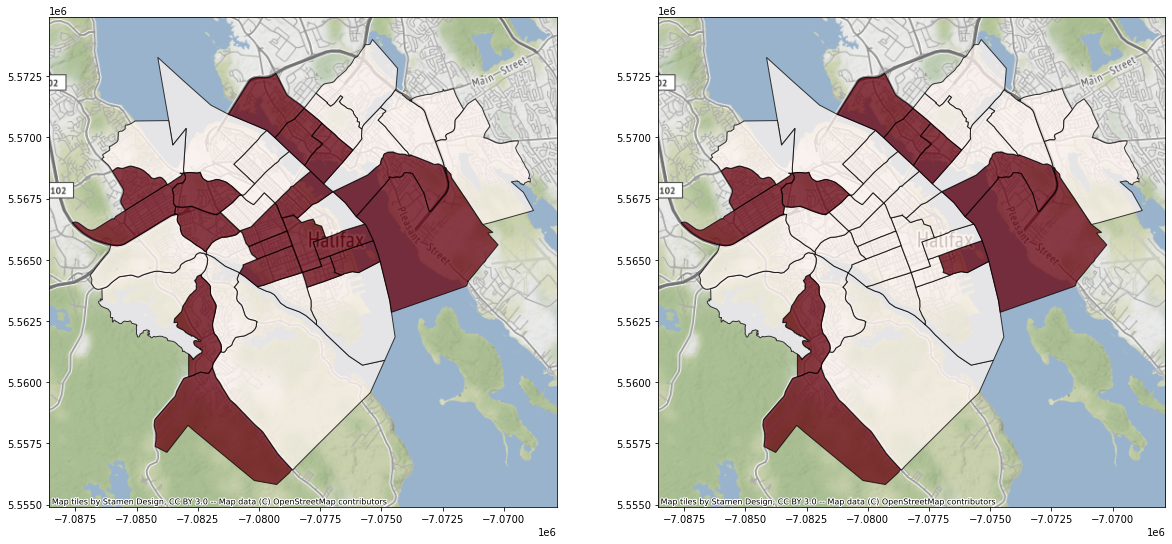

In [147]:
print(percentiles_home)
fig, (ax1,ax2) = plt.subplots(1, 2)
fig.set_figheight(20)
fig.set_figwidth(20)
home = gpd.GeoDataFrame(census_tracts, geometry='geometry')
home.plot(column='income_eligible', ax=ax1, edgecolor='k', cmap='Reds', alpha=0.75)
home.plot(column='home_eligible', ax=ax2, edgecolor='k', cmap='Reds', alpha=0.75)
ctx.add_basemap(ax1, zoom=12)
ctx.add_basemap(ax2, zoom=12)

## Determine gentrification status from 2006 to 2016 tract data

Gentrification-eligible tracts are determined to have gentrified over a time period if they meet the following criteria:

1. An increase in a tract's educational attainment, as measured by the percentage of residents age 25 and over holding bachelor’s degrees, is in the top third percentile of all tracts within a metro area.
2. A tract’s median home value increases when adjusted for inflation.
3. The percentage increase in a tract’s inflation-adjusted median home value is in the top third percentile of all tracts within a metro area.

In [118]:
educ2006 = np.array(halifax2006['p_educ'])
educ2016 = np.array(halifax2016['p_educ'])
educ_difference = []
for i in range(len(educ2006)):
  if (educ2016[i] - educ2006[i]) < 0:
    educ_difference.append(0)
  else:
    educ_difference.append(educ2016[i] - educ2006[i])
educ_difference = np.array(educ_difference)
print(educ_difference)

min_educ = educ_difference.min()
max_educ = educ_difference.max()
percentiles2006 = (educ_difference - min_educ) / (max_educ - min_educ) * 100

eligible_increases = []
for i in range(len(percentiles2006)):
  if percentiles2006[i] > 66.66 and halifax2006['tid'][i] in eligible_tracts:
    eligible_increases.append(halifax2006['tid'][i])

print(eligible_increases)

[0.04002367 0.01229322 0.00880503 0.         0.02997106 0.
 0.         0.         0.04358987 0.14019156 0.09295662 0.05193966
 0.         0.01041862 0.05436336 0.00151206 0.05792357 0.05206586
 0.03573144 0.08238246 0.1940221  0.07628626 0.03888643 0.07728858
 0.09312959 0.00575651 0.02938371 0.02639319 0.02133373 0.06427588
 0.04982639 0.         0.02267769 0.02752253 0.02828481 0.05015712
 0.0667296  0.02949697]
[ 20.62840719   6.33598866   4.53815889   0.          15.44724009
   0.           0.           0.          22.46644578  72.25546156
  47.91032461  26.76997212   0.           5.36981262  28.01916128
   0.77932412  29.85411105  26.83501729  18.41617204  42.46034946
 100.          39.31833517  20.04227086  39.83493715  47.99947888
   2.96693476  15.14451529  13.60318878  10.99551723  33.12812578
  25.68078277   0.          11.68820071  14.18525342  14.5781365
  25.85124119  34.39278535  15.20289473]
[]


In [104]:
inflation_rate = 1.1777
for i in range(len(halifax2006['tid'])):
  if ((halifax2006['home'][i]*inflation_rate) < halifax2016['home'][i]) and (halifax2006['tid'][i] in eligible_increases):
    print(halifax2006['tid'][i])

2050004.01


In [112]:
home2006 = np.array(halifax2006['home'])
home2016 = np.array(halifax2016['home'])
home_difference = []
for i in range(len(home2006)):
  home_difference.append(home2016[i] - home2006[i])
home_difference = np.array(home_difference)
print(home_difference)

min_home = home_difference.min()
max_home = home_difference.max()
percentiles = (home_difference - min_home) / (max_home - min_home) * 100

gentrified_tracts = []
for i in range(len(percentiles)):
  if percentiles[i] < 33.33 and halifax2006['tid'][i] in eligible_tracts:
    eligible_increases.append(halifax2006['tid'][i])

print(eligible_increases)

[ 93637 105897 406583 203345 125768 421965 261624 143832 232520 106174
 126693 134349 183524 249037  97861  73855  92872 129082 127859 140453
  96560 130099 103385  94710 114400  57711  81667  72687  56677 103222
  72773  34136  99685  92540  77569 105080  58009  61652]


In [ ]:
fig, ax = plt.subplots(1, 1)
fig.set_figheight(10)
for i in range(len(halifax2006['tid'])):
  if halifax2006['tid'][i] in gentrified_tracts:
    halifax2006.loc[[i],'geometry'].plot(ax=ax, edgecolor='k', color='#3f2da5', alpha=0.75)
ctx.add_basemap(ax, zoom=12)